In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("/Users/sunilv/concept_learning_exp/semi_supervised_classification/Exp_32_128_64_10_ELBOW_42/analysis/z_train_cluster_dist_128_32_10_1.0.csv")

In [4]:
df.columns

Index(['label', 'label_predicted', 'mu_0', 'mu_1', 'mu_2', 'mu_3', 'mu_4',
       'mu_5', 'mu_6', 'mu_7', 'mu_8', 'mu_9', 'sigma_0', 'sigma_1', 'sigma_2',
       'sigma_3', 'sigma_4', 'sigma_5', 'sigma_6', 'sigma_7', 'sigma_8',
       'sigma_9', 'z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5', 'z_6', 'z_7',
       'z_8', 'z_9', 'cluster_level_1', 'distance_0', 'distance_1',
       'distance_2', 'distance_3', 'distance_4', 'distance_5', 'distance_6',
       'distance_7', 'distance_8', 'distance_9', 'cluster_level_2',
       'distance_level_2_1_0', 'distance_level_2_1_1', 'distance_level_2_1_2',
       'distance_level_2_1_3', 'distance_level_2_1_4', 'distance_level_2_1_5',
       'distance_level_2_1_6', 'distance_level_2_1_7', 'distance_level_2_1_8',
       'distance_level_2_1_9', 'manual_annotation',
       'manual_annotation_confidence', 'distance_to_confidence'],
      dtype='object')

In [5]:
df.shape

(59840, 57)

In [6]:
_df = df[df["manual_annotation"] == 1]

In [7]:
_df.shape

(10446, 57)

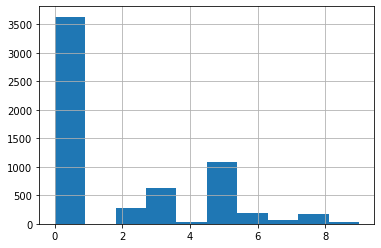

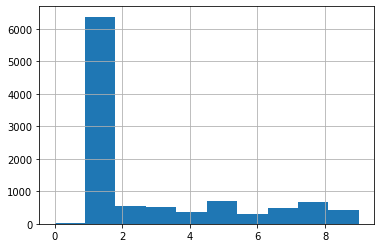

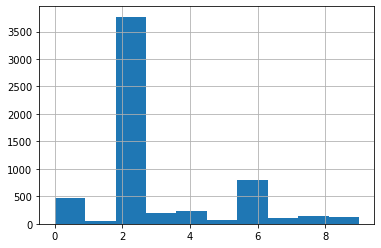

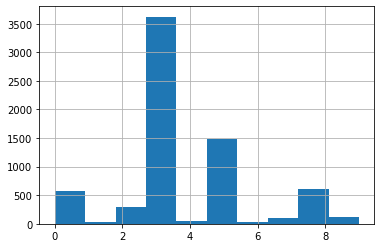

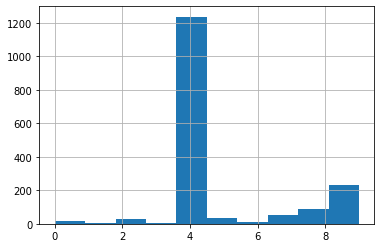

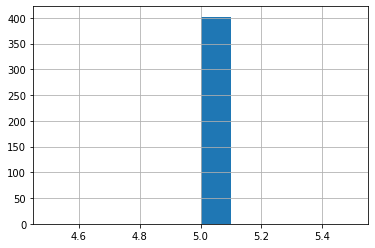

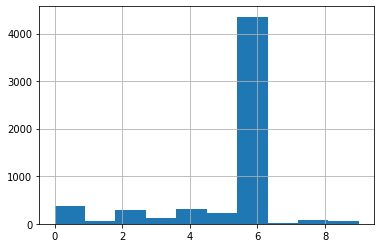

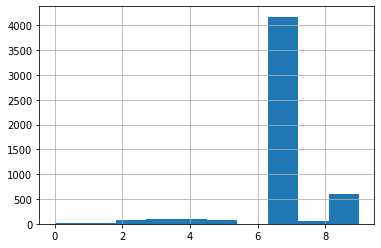

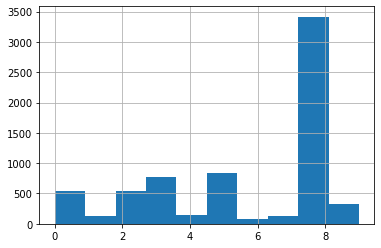

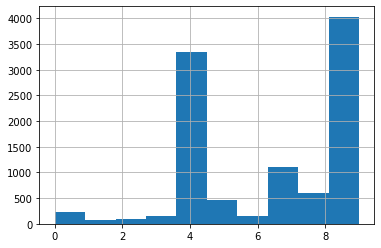

In [8]:
for label in range(10):
    plt.figure()
    _df = df[df["manual_annotation"] == label]
    _df["label"].hist()

In [9]:
_df = df[df["manual_annotation_confidence"] == 0]

In [10]:
_df.shape

(1795, 57)

In [11]:
_df = df[df["manual_annotation"] == df["label"]]

In [12]:
_df.shape

(35012, 57)

In [13]:
df.shape

(59840, 57)

In [14]:
35012/59840

0.5850935828877005

In [15]:
_df = df[df["cluster_level_1"] == 0]


In [16]:
_df.shape

(5301, 57)

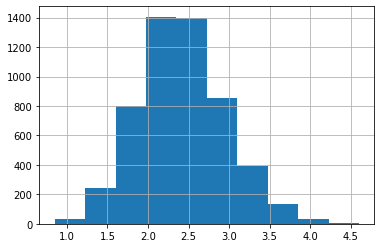

In [17]:
_df["distance_0"].hist()

In [18]:
d_step =  0.5
_df = df[df["cluster_level_1"] == 0]
d_ths =[]
p_corrects = []
for i in range(0,20):
    d_th = i * d_step
    __df = _df[_df["distance_0"] < d_th]
    if __df.shape[0] > 0:
        num_correct = __df[__df["manual_annotation"] == __df["label"]].shape[0]
        percent_correct = (100 * num_correct) / __df.shape[0]
    else:
        percent_correct = 0
    d_ths.append(d_th)
    p_corrects.append(percent_correct)
    print(d_th, (__df.shape[0] * 100) / _df.shape[0], percent_correct )


0.0 0.0 0
0.5 0.0 0
1.0 0.1320505564987738 85.71428571428571
1.5 3.11262026032824 75.15151515151516
2.0 21.731748726655347 61.71875
2.5 57.93246557253348 55.6496255291436
3.0 86.37992831541219 53.33042148940817
3.5 97.00056593095643 52.41151302994943
4.0 99.58498396528957 52.0553135063459
4.5 99.98113563478589 52.056603773584904
5.0 100.0 52.046783625730995
5.5 100.0 52.046783625730995
6.0 100.0 52.046783625730995
6.5 100.0 52.046783625730995
7.0 100.0 52.046783625730995
7.5 100.0 52.046783625730995
8.0 100.0 52.046783625730995
8.5 100.0 52.046783625730995
9.0 100.0 52.046783625730995
9.5 100.0 52.046783625730995


In [22]:
_df.shape

(5301, 57)

([<matplotlib.axis.XTick at 0x7f8d1b6f8210>,
 <a list of 10 Text xticklabel objects>)

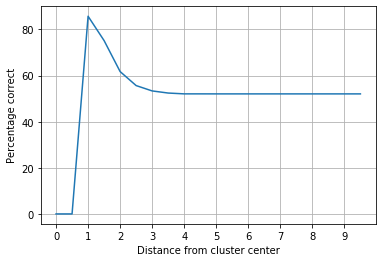

In [21]:
plt.plot(d_ths, p_corrects)
plt.xlabel("Distance from cluster center")
plt.ylabel("Percentage correct")
plt.grid("both")
plt.xticks(list(range(10)))

In [61]:
__df = _df[(_df["distance_0"] < 2.5) & (_df["distance_0"] > 2)]

In [24]:
__df.shape

(1919, 57)

In [32]:
pd.set_option('display.max_rows', 1000)

In [33]:
__df[["distance_0","manual_annotation_confidence"]].head(100)

,distance_0,manual_annotation_confidence
2,2.249268,0.637722
6,2.438154,0.614080
42,2.340304,0.626215
50,2.122849,0.654051
62,2.247152,0.637992
136,2.269421,0.635156
151,2.336444,0.626699
209,2.144349,0.651245
224,2.302573,0.630959
261,2.261610,0.636149


In [70]:
_df["manual_annotation_confidence"].mean()

0.6194635395969844

In [23]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 5, 20)


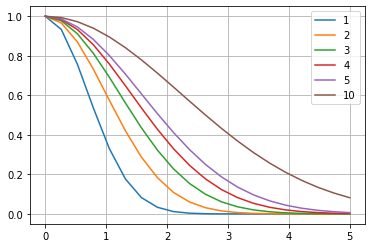

In [26]:
for K in [1,2,3,4,5,10]:
    y = np.exp(-1/K * x * x)
    plt.plot(x,y, label=str(K))

plt.legend()
plt.grid("both")